# Explore exoS/exoU genes

This notebook specifically explores the exoS (PAO1) and exoU (PA14) accessory-accessory modules to determine if there is an interesting biological story here.

_P. aeruginosa_ uses a type III secretion system (T3SS) to promote development of severe disease, particularly in patients with impaired immune defenses. _P. aeruginosa_ uses a type III secretion system to inject toxic effector proteins into the cytoplasm of eukaryotic cells. ExoU, ExoS, and ExoT, three effector proteins secreted by this system. ExoU and ExoS are usually secreted by different strains.

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC529154/

TO DO:
* Expand description to all exo's
* Might move this analysis to a new location if we want to include core genes as well

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import os
import scipy
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scripts import utils, paths, annotations

np.random.seed(1)

/home/alexandra/anaconda3/envs/core_acc/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [2]:
# Clustering method
method_name = "affinity"

# Gene subset
gene_subset = "acc"

# Select modules containing exoS (module 7) and exoU (module 17)
exoS_module_id = 7
exoU_module_id = 17

## Load correlation matrix

In [3]:
# Load correlation matrix
pao1_corr_filename = paths.PAO1_CORR_LOG_SPELL_ACC
pa14_corr_filename = paths.PA14_CORR_LOG_SPELL_ACC

In [4]:
pao1_corr = pd.read_csv(pao1_corr_filename, sep="\t", index_col=0, header=0)
pa14_corr = pd.read_csv(pa14_corr_filename, sep="\t", index_col=0, header=0)

## Load module membership

In [5]:
pao1_membership_filename = os.path.join(
    paths.LOCAL_DATA_DIR, f"pao1_modules_{method_name}_{gene_subset}.tsv"
)
pa14_membership_filename = os.path.join(
    paths.LOCAL_DATA_DIR, f"pa14_modules_{method_name}_{gene_subset}.tsv"
)

In [6]:
pao1_membership = pd.read_csv(pao1_membership_filename, sep="\t", header=0, index_col=0)
pa14_membership = pd.read_csv(pa14_membership_filename, sep="\t", header=0, index_col=0)

## Select genes associated with modules of interest

In [7]:
exoS_module_df = pao1_membership[pao1_membership["module id"] == exoS_module_id]
exoU_module_df = pa14_membership[pa14_membership["module id"] == exoU_module_id]

In [8]:
exoS_module_df.head()

,module id
PA0257,7
PA5265,7
PA1427,7
PA0100,7
PA0187,7


In [9]:
exoU_module_df.head()

,module id
PA14_51950,17
PA14_14320,17
PA14_33980,17
PA14_33970,17
PA14_28460,17


## Examine exoS and exoU modules

In [10]:
# Get gene id for exoS and exoU
exoS_id = "PA3841"
exoU_id = "PA14_51530"

In [11]:
exoS_module_gene_ids = list(exoS_module_df.index)
exoU_module_gene_ids = list(exoU_module_df.index)

In [12]:
# Import gene metadata
pao1_gene_annot_filename = paths.GENE_PAO1_ANNOT
pa14_gene_annot_filename = paths.GENE_PA14_ANNOT

pao1_gene_annot = pd.read_csv(pao1_gene_annot_filename, index_col=0, header=0)
pa14_gene_annot = pd.read_csv(pa14_gene_annot_filename, index_col=0, header=0)

In [13]:
# Get df with gene ids as indices and gene names as a column
# Having the data in a df instead of a series will just allow me to do my merges that are in the notebook
pao1_gene_annot = pao1_gene_annot["Name"].to_frame("gene name")
pa14_gene_annot = pa14_gene_annot["Name"].to_frame("gene name")

In [14]:
pao1_gene_annot.head()

,gene name
PAO1_ID,
PA0001,dnaA
PA0002,dnaN
PA0003,recF
PA0004,gyrB
PA0005,lptA


In [15]:
# Add gene names to heatmap
def add_gene_name_to_index(annot_df, corr_df):

    # Only consider genes in the correlation matrix
    annot_index_df = annot_df.loc[corr_df.index]
    annot_columns_df = annot_df.loc[corr_df.columns]

    new_index = []
    for gene_id in annot_index_df.index:
        if pd.isnull(annot_index_df.loc[gene_id, "gene name"]):
            new_index.append(gene_id)
        else:
            new_index.append(annot_index_df.loc[gene_id, "gene name"])

    new_columns = []
    for gene_id in annot_columns_df.index:
        if pd.isnull(annot_columns_df.loc[gene_id, "gene name"]):
            new_columns.append(gene_id)
        else:
            new_columns.append(annot_columns_df.loc[gene_id, "gene name"])

    # Rename index and columns
    corr_df.index = new_index
    corr_df.columns = new_columns

    return corr_df

In [16]:
exoS_corr_module = pao1_corr.loc[exoS_module_gene_ids, exoS_module_gene_ids]
exoU_corr_module = pa14_corr.loc[exoU_module_gene_ids, exoU_module_gene_ids]

exoS_corr_module_names = add_gene_name_to_index(pao1_gene_annot, exoS_corr_module)
exoU_corr_module_names = add_gene_name_to_index(pa14_gene_annot, exoU_corr_module)

CPU times: user 380 ms, sys: 168 ms, total: 547 ms
Wall time: 224 ms


Text(0.5, 1.05, 'Correlation of exoS module')

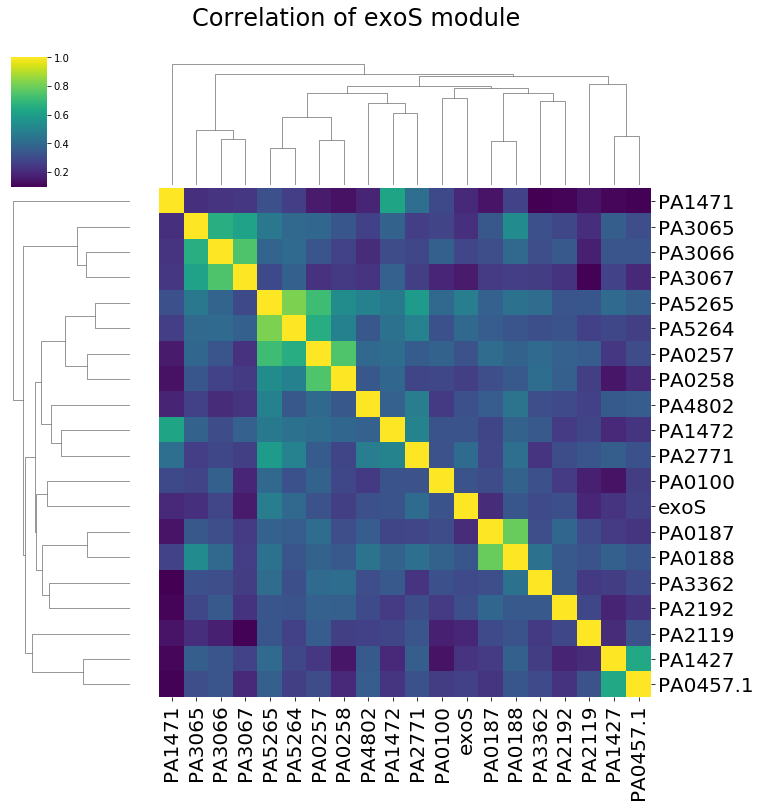

In [17]:
%%time
f1 = sns.clustermap(exoS_corr_module_names.abs(), cmap="viridis")
f1.ax_heatmap.set_xticklabels(f1.ax_heatmap.get_xmajorticklabels(), fontsize=20)
f1.ax_heatmap.set_yticklabels(f1.ax_heatmap.get_ymajorticklabels(), fontsize=20)
f1.fig.suptitle("Correlation of exoS module", y=1.05, fontsize=24)

CPU times: user 380 ms, sys: 176 ms, total: 556 ms
Wall time: 203 ms


Text(0.5, 1.05, 'Correlation of exoU module')

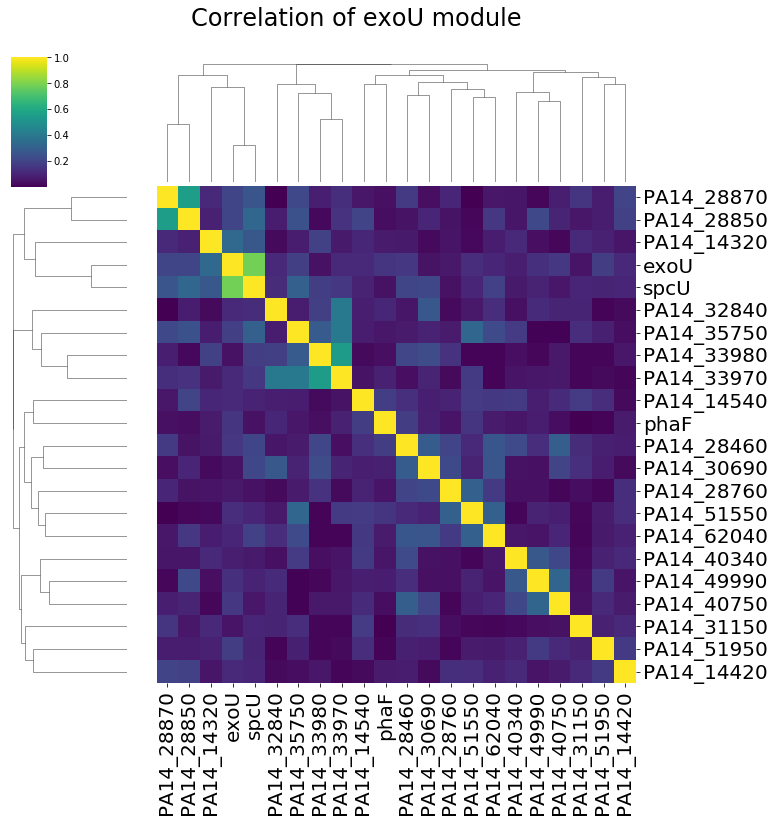

In [18]:
%%time
g1 = sns.clustermap(exoU_corr_module_names.abs(), cmap="viridis")
g1.ax_heatmap.set_xticklabels(g1.ax_heatmap.get_xmajorticklabels(), fontsize=20)
g1.ax_heatmap.set_yticklabels(g1.ax_heatmap.get_ymajorticklabels(), fontsize=20)
g1.fig.suptitle("Correlation of exoU module", y=1.05, fontsize=24)

**Takeaway**
We've aggregated the information from this notebook into a [google sheet](https://docs.google.com/spreadsheets/d/1AuD1Q4lHhWNp5xzgW-hi8mHkHFyd91rmOksXXuAwk4Q/edit#gid=533448426) to easily share with collaborators. This sheet contains Uniprot annotations for each gene within the exoS and exoU modules. The sheet also contains a sorted matrix of genes and how correlated they are with exoS and exoU.

* Genes within exoS module appear to be more highly correlated with exoS (see sheet) and each other (see heatmap) unlike exoU module
    * What might this mean about exoS, exoU?
    * Despite being part of the same T3S system, their relationship to other accessory genes is different
* Based on gene annotations, is there a different mechanism by which exoS contributes to virulence compared to exoU?
    * This is difficult to answer with so many unannotated genes

Some more reading will need to be done to determine the biological motivation here:
* What is known about the mechanism by which these genes contribute to virulence?
* What can we learn from module composition?
* What can we learn from most co-expressed genes?

## Other relationships between exoS/U and other genes

In [19]:
# Read in correlation for all genes
pao1_all_corr_filename = paths.PAO1_CORR_LOG_SPELL
pa14_all_corr_filename = paths.PA14_CORR_LOG_SPELL

pao1_all_corr = pd.read_csv(pao1_all_corr_filename, sep="\t", index_col=0, header=0)
pa14_all_corr = pd.read_csv(pa14_all_corr_filename, sep="\t", index_col=0, header=0)

In [20]:
# Get correlation between exoS/U and all other genes
exoS_all_corr = pao1_all_corr.loc[exoS_id].to_frame("corr to exoS")
exoU_all_corr = pa14_all_corr.loc[exoU_id].to_frame("corr to exoU")

In [21]:
print(exoS_all_corr.shape)
exoS_all_corr.head()

(5563, 1)


,corr to exoS
PA0001,-0.002313
PA0002,0.114963
PA0003,-0.024771
PA0004,0.083573
PA0005,0.000713


In [22]:
print(exoU_all_corr.shape)
exoU_all_corr.head()

(5887, 1)


,corr to exoU
PA14_55610,0.037039
PA14_55600,-0.003912
PA14_55590,-0.062092
PA14_55580,0.032857
PA14_55570,0.079695


In [23]:
# Add gene name annotation
exoS_all_corr = exoS_all_corr.merge(
    pao1_gene_annot, left_index=True, right_index=True, how="left"
)
exoU_all_corr = exoU_all_corr.merge(
    pa14_gene_annot, left_index=True, right_index=True, how="left"
)

In [24]:
print(exoS_all_corr.shape)
exoS_all_corr.head()

(5563, 2)


,corr to exoS,gene name
PA0001,-0.002313,dnaA
PA0002,0.114963,dnaN
PA0003,-0.024771,recF
PA0004,0.083573,gyrB
PA0005,0.000713,lptA


In [25]:
print(exoU_all_corr.shape)
exoU_all_corr.head()

(5887, 2)


,corr to exoU,gene name
PA14_55610,0.037039,dnaE2
PA14_55600,-0.003912,NaN
PA14_55590,-0.062092,NaN
PA14_55580,0.032857,nemO
PA14_55570,0.079695,NaN


### Add gene group labels for: core, acc, in module-acc

In [26]:
# Get core genes
pao1_expression_filename = paths.PAO1_COMPENDIUM
pa14_expression_filename = paths.PA14_COMPENDIUM

pao1_annot_filename = paths.GENE_PAO1_ANNOT
pa14_annot_filename = paths.GENE_PA14_ANNOT

In [27]:
# Make a dataframe with gene ids
pao1_gene_ids = pd.DataFrame(data=[], index=pao1_all_corr.index)
pa14_gene_ids = pd.DataFrame(data=[], index=pa14_all_corr.index)

In [28]:
(
    pao1_arr,
    pa14_arr,
    pao1_core,
    pao1_acc,
    pa14_core,
    pa14_acc,
) = annotations.map_core_acc_annot(
    pao1_gene_ids,
    pa14_gene_ids,
    pao1_expression_filename,
    pa14_expression_filename,
    pao1_annot_filename,
    pa14_annot_filename,
)

Number of PAO1 core genes: 5366
Number of PA14 core genes: 5363
Number of PAO1 core genes in my dataset: 5361
Number of PA14 core genes in my dataset: 5357
Number of PAO1-specific genes: 202
Number of PA14-specific genes: 530


In [29]:
# Label
exoS_all_corr.loc[pao1_core, "label"] = "core"
exoS_all_corr.loc[pao1_acc, "label"] = "acc"
exoS_all_corr.loc[exoS_module_gene_ids, "label"] = "acc-module"

exoU_all_corr.loc[pa14_core, "label"] = "core"
exoU_all_corr.loc[pa14_acc, "label"] = "acc"
exoU_all_corr.loc[exoU_module_gene_ids, "label"] = "acc-module"

In [30]:
print(exoS_all_corr.shape)
exoS_all_corr.head()

(5563, 3)


,corr to exoS,gene name,label
PA0001,-0.002313,dnaA,core
PA0002,0.114963,dnaN,core
PA0003,-0.024771,recF,core
PA0004,0.083573,gyrB,core
PA0005,0.000713,lptA,core


In [31]:
print(exoU_all_corr.shape)
exoU_all_corr.head()

(5887, 3)


,corr to exoU,gene name,label
PA14_55610,0.037039,dnaE2,core
PA14_55600,-0.003912,NaN,core
PA14_55590,-0.062092,NaN,core
PA14_55580,0.032857,nemO,core
PA14_55570,0.079695,NaN,core


In [32]:
# Save
exoS_all_corr.to_csv("exoS_relationship.tsv", sep="\t")
exoU_all_corr.to_csv("exoU_relationship.tsv", sep="\t")

**Takeaway**
What can we say about the relationship between exoS/U and all other genes?
* exoS/U are most highly correlated with other core genes including the other genes within the T3SS like exoT and exoY as well as the translocation apparatus that interacts with the host (popB, popD, pcrV), needle complex that secretes the proteins (pscNLJCF): https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2766515/
* Do the highly correlated core genes for exoS compare against those genes found to be highly correlated using eADAGE nodes?
    * Yes, by a manual inspection there is good concordance between the genes found to be highly correlated with exoS and those found in the same G-G network created from eADAGE: https://adage.greenelab.com/genes?model=1&genes=2251. These genes include the other exo genes, pcr genes, pop genes, psc genes.
    * We cannot use the eADAGE network to validate our accessory modules since eADAGE doesn't include accessory genes.